In [0]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import os
import zipfile

print(tf.__version__)

In [0]:
!mkdir /root/.kaggle
!echo '{"username":"<Your Username>","key":"<Your API key>"}' > /root/.kaggle/kaggle.json

!kaggle datasets download -d ahmetfurkandemr/mask-datasets-v1

In [0]:
!mkdir /root/.kaggle
!echo '{"username":"<Your username>","key":"<Your API key>"}' > /root/.kaggle/kaggle.json

!kaggle datasets download -d ahmetfurkandemr/mask-datasets-v1

In [0]:
local_zip_file = '/content/mask-datasets-v1.zip'

zip_refs = zipfile.ZipFile(local_zip_file, 'r')

zip_refs.extractall('/content')
zip_refs.close()

In [0]:
base_dir = '/content/Mask_Datasets'

train_dir = os.path.join( base_dir, 'Train')
validation_dir = os.path.join( base_dir, 'Validation')

train_mask_dir = os.path.join(train_dir, 'Mask') 
train_no_mask_dir = os.path.join(train_dir, 'No_mask') 

validation_mask_dir = os.path.join(validation_dir, 'Mask')
validation_no_mask_dir = os.path.join(validation_dir, 'No_mask') 

train_mask_fnames = os.listdir(train_3_dir)
train_no_mask_fnames = os.listdir(train_4_dir)

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,rotation_range=15,
                                    width_shift_range=0.15,
                                    height_shift_range=0.15,
                                    shear_range=0.15,
                                    zoom_range=0.15,
                                    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 32,
                                                    class_mode = 'binary', 
                                                    target_size = (150,150))     

validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                        batch_size  = 32,
                                                        class_mode  = 'binary', 
                                                        target_size = (150,150))


In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(246, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

In [0]:
model.compile(loss = 'binary_crossentropy', optimizer=RMSprop(lr=0.001), 
              metrics=['accuracy'])


In [0]:
history = model.fit(train_generator, epochs=100, steps_per_epoch=23,
                    validation_data = validation_generator, verbose = 1, 
                    validation_steps=10)


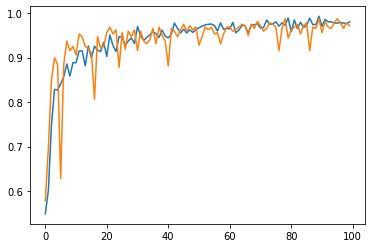

In [0]:
t_a=history.history['acc']
v_a=history.history['val_acc']
plt.plot([i for i in range(0,len(t_a))],t_a)
plt.plot([i for i in range(0,len(v_a))],v_a)


In [0]:
import numpy as np
import tensorflow as tf
from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " no mask")
    
  else:
    print(fn + " is a mask")
 

In [0]:
model.save("model2.h5")